In [ ]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import bernoulli, binom, variation, norm
import time
from google.colab import drive
from sklearn import linear_model
import statsmodels.api as sm
import statistics
plt.style.use('seaborn-dark')
drive.mount('/content/drive')

Mounted at /content/drive


##PROBLEM 1

In [ ]:
transformed = []; rnorms = []
for i in range(10000):
  X = [np.random.normal(0, np.sqrt(3)) for i in range(100)]
  if i == 1:
    sample = X
  transformed_x = [v**2 + np.cos(v) for v in X]
  transformed.append(transformed_x)
  rnorms.append(X)

xbar = np.mean(transformed[0])
s = np.std(transformed[0])
print("95% confidence interval for u is {} +/- {}".format(xbar, 1.96*s*np.sqrt(1/100)))

In [ ]:
transformed_means = []; rnorms_means = []
for i in range(len(transformed)):
  transformed_means.append(np.mean(transformed[i]))
  rnorms_means.append(np.mean(rnorms[i]))

plt.hist(transformed_means, bins=50, density = True)
plt.hist(rnorms_means, bins=50, density = True)
plt.xlabel("Sample Means")
plt.ylabel("Density")
plt.legend(['X^2 + cos (X)','N(0,3)'])

##PROBLEM 2

In [ ]:
def func(x, S = 90, r = 0.04, delta = 0.25):
  return S * np.exp(delta * x + (r - (delta**2)/2)*2)

transformed = []; rnorms = []
for i in range(10000):
  X = [np.random.normal(0, np.sqrt(2)) for i in range(100)]
  if i == 1:
    sample = X
  transformed_x = [func(v) for v in X]
  transformed.append(transformed_x); rnorms.append(X)

ey = np.mean(transformed[0])
s = np.std(transformed[0])
print("95% confidence interval for u is {} +/- {}".format(ey, 1.96*s*np.sqrt(1/100)))

In [ ]:
transformed_means = []; rnorms_means = []
for i in range(len(transformed)):
  transformed_means.append(np.mean(transformed[i]))
  rnorms_means.append(np.mean(rnorms[i]))

plt.hist(transformed_means, bins=50, density = True)
plt.xlabel("Sample Means")
plt.ylabel("Density")

##PROBLEM 3

In [ ]:
dt = .01
t0 = 0
tf = 3
a = .05
b = .20
X0 = 100

In [ ]:
def dWt(dt):
  return math.sqrt(dt)*np.random.normal(loc=0,scale=1)

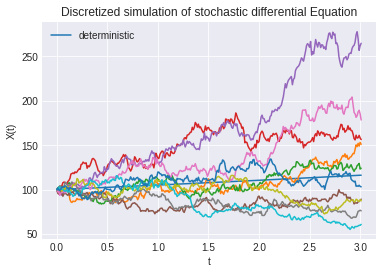

In [ ]:
#Euler Maruyama
n_sims = 10

t = [t0]
t_temp = t0
X = []
for i in range(n_sims):
  X.append([X0])
count = 0
while t_temp < tf:
  count += 1
  t_temp += dt
  t.append(t_temp)
  for i in range(n_sims):
    X[i].append(X[i][count-1] + a*X[i][count-1]*dt + b*X[i][count-1]*dWt(dt))

y = [X0]
for i in range(1,len(t)):
  y.append(y[i-1] + a*y[i-1]*dt)

plt.plot(t,y)
for i in range(n_sims):
  plt.plot(t,X[i])

plt.xlabel('t')
plt.ylabel('X(t)')
plt.title('Discretized simulation of stochastic differential Equation')
plt.legend(['deterministic'])
plt.grid(True)
plt.show()

In [ ]:
# Now we can take many samples of T_3 through repeated Euler-Maruyama

n_samples = 10000

t0 = 0
tf = 3

t = t0
X = []
for i in range(n_samples):
  X.append(X0)

while t < tf:
  t += dt
  for i in range(n_samples):
    X[i] = X[i] + a*X[i]*dt + b*X[i]*dWt(dt)

bin_list = []
for i in range(100):
  bin_list.append(4*i)

plt.hist(X, bins=bin_list)
plt.show
plt.xlabel('X_3')
plt.ylabel('frequency')
plt.title('10000 samples of X_3 using Euler-Maruyama method')
plt.grid(True)

ev = sum(X)/len(X)
print('Expected value of X_3: ' + str(ev))

count = 0
for i in range(len(X)):
  if X[i] > 2:
    count += 1
  X[i] = X[i]**0.4
print('P(X_3>2) is roughly equal to ' + str(count/n_samples))
ev = sum(X)/len(X)
print('Expected value of X_3^0.4: ' + str(ev))

In [ ]:
# Sample from the analytical solution for X_3

n_samples = 10000
X = []
for i in range(n_samples):
  X.append(X0*math.exp(a*3+b*math.sqrt(3)*np.random.normal(loc=0,scale=1)))

bin_list = []
for i in range(100):
  bin_list.append(4*i)

plt.hist(X, bins=bin_list)
plt.show
plt.xlabel('X_3')
plt.ylabel('frequency')
plt.title('10000 samples of X_3 using analytical solution')
plt.grid(True)

ev = sum(X)/len(X)
print('Expected value of X_3: ' + str(ev))
count = 0
for i in range(len(X)):
  if X[i] > 2:
    count += 1
  X[i] = X[i]**0.4
print('P(X_3>2) is roughly equal to ' + str(count/n_samples))
ev = sum(X)/len(X)
print('Expected value of X_3^0.4: ' + str(ev))

##PROBLEM 4

In [ ]:
# Create dataframe (matrix of data)
data = {'y':[85, 110, 90, 80, 90, 95, 80, 98, 91, 95],
        'x1':[1, 1, -1, -1, 0, 0, 1, -2, 2, 1.5],
        'x2':[-1, 1, 1, -1, 0, 1, 0, 1, 2, 1]
}
df = pd.DataFrame(data)
# Create squared terms
x1sq = df['x1']**2
x2sq = df['x2']**2
df['x1sq'] = x1sq; df['x2sq'] = x2sq
# Designate Y and X matrices
x = df[['x1', 'x2', 'x1sq', 'x2sq']]
y = df['y']
# Regression and obtaining coefficients 1
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant

# Regression and obtaining coefficients 2
model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

b)
Ho B3 = B4 = 0;
RR: |t| > t a/2;
t for B3 = .093, while t a/2 = .93;
t for B4 = .576, while t a/2 = .59;
Neither fall within RR, therefore fail to reject Ho.

c) 95% Confidence Interval for Y* if x1 = 1; x2 = 0;
= a'B +- t(a/2)sqrt(a'((X'X)^(-1))a); ta/2 = 2.306; SSE = Y'Y - B'(X'Y) = 397.01; S = sqrt(SSE/n-(k+1)) = 8.91; CI = 90.52 +- 2.306(8.91)sqrt(.396) = 90.52 +- 12.93

d) 95% Prediction Interval for Y* if x1 = 1; x2 = 0; = a'B +- t(a/2)sqrt(1 + a'((X'X)^(-1))a) = 90.52 +- 2.306(8.91)sqrt(1.396) = 90.52 +- 24.28;

In [ ]:
# 95% confidence interval for EY* is EY* +/- t * s * sqrt(1/n + (x* - xbar)**2/Sxx)
# 95% prediction interval for Y* is Y* +/- t * s * sqrt(1 + 1/n + (x*-xbar)**2/Sxx)

##PROBLEM 5

In [ ]:
# Read in Excels
TSLAyearToday = pd.read_csv('/content/drive/Shareddrives/MATH 408 Project 2/TSLA (11-20-21 - 11-20-22).csv', header=0, low_memory=False)
AAPLyearToday = pd.read_csv('/content/drive/Shareddrives/MATH 408 Project 2/AAPL (11-20-21 - 11-20-22).csv', header=0, low_memory=False)
# Create Daily Return Columns
TSLAyearToday['Daily Return'] = TSLAyearToday['Last Close'] - TSLAyearToday['Close']
AAPLyearToday['Daily Return'] = AAPLyearToday['Last Close'] - AAPLyearToday['Close']
# TSLAyearToday

In [ ]:
#Plot Histogram from CSVs
TSLAyearTodayHist = TSLAyearToday.hist('Daily Return', bins = 40, density = True)
plt.xlabel("Daily Return")
plt.title("TSLA's Daily Returns Over 11/20/21 - 11/20/22")
#Create Overlay
mu, std = norm.fit(TSLAyearToday['Daily Return'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 251)
p = norm.pdf(x, mu, std) #Best Fit
q = norm.pdf(x, mu, std*0.8)
g = norm.pdf(x, mu, std*1.2)
# adjustednorm = norm.pdf(x, 0.815976, 11.603081)
#Plot Together
plt.plot(x, p, 'k', linewidth=2, color = "red")
plt.plot(x, q, 'k', linewidth=2, color = "blue")
plt.plot(x, g, 'k', linewidth=2, color = "green")
# plt.plot(x, adjustednorm, 'k', linewidth=2, color = "yellow")
plt.show()

In [ ]:
np.random.seed(1)
fig = sm.qqplot(TSLAyearToday['Daily Return'], line='45')
plt.show()

In [ ]:
#Plot Histogram from CSVs
AAPLyearTodayHist = AAPLyearToday.hist('Daily Return', bins = 40, density = True)
plt.xlabel("Daily Return")
plt.title("AAPL's Daily Returns Over 11/20/21 - 11/20/22")
#Create Overlay
mu, std = norm.fit(AAPLyearToday['Daily Return'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) #Best Fit
q = norm.pdf(x, mu, std*0.8)
g = norm.pdf(x, mu, std*1.2)
#Plot Together
plt.plot(x, p, 'k', linewidth=2, color = "red")
plt.plot(x, q, 'k', linewidth=2, color = "blue")
plt.plot(x, g, 'k', linewidth=2, color = "green")
plt.show()

In [ ]:
# np.random.seed(1)
fig = sm.qqplot(AAPLyearToday['Daily Return'], line='45')
plt.show()

In [ ]:
#Independence
plt.plot(AAPLyearToday['Daily Return'], TSLAyearToday['Daily Return'])
plt.title("Apple and Tesla Stocks Daily Returns, Connected Chronologically")
plt.xlabel("Apple Stock Daily Returns")
plt.ylabel("Tesla Stock Daily Returns")

In [ ]:
#Sign Ranked Test
def signRankedTest(dataSet = []):
  # obtain mean and standard deviation of the data set
  mu, std = norm.fit(dataSet['Daily Return'])
  # normalize data
  dataSet['Normalized'] = (dataSet['Daily Return'] - mu) /std
  # use mu and standard deviation to calculate differences from
  # normal distribution of best fit
  dataSet['Differences'] = dataSet['Normalized'] - \
                              ((1/(std*np.sqrt(np.pi*2))) \
                  * np.exp(-0.5*((dataSet['Daily Return']-mu)/std)**2))
  # obtain absolute value of differences to rank
  dataSet['Abs Differences'] = abs(dataSet['Differences'])
  dataSet.sort_values(by=['Abs Differences'], inplace = True)
  dataSet.reset_index()
  dataSet['Rank'] = dataSet.index
  # Sum ranks of positive differences
  sumOfPositiveRanks = 0
  for i in range(0,251,1):
    if dataSet['Differences'][i] > 0:
      sumOfPositiveRanks += dataSet['Rank'][i]
  #calculate and print Z statistic
  zstat = ((sumOfPositiveRanks - (251*252)/4)/\
           (math.sqrt((251*252*503)/24)))
  print(zstat)
#Reject if less than negative zalpha/2, more than positive zalpha/2
signRankedTest(AAPLyearToday)
signRankedTest(TSLAyearToday)